<a href="https://colab.research.google.com/github/rajaganesh1357/Time_Series_Repository/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [89]:
data = pd.read_csv("https://raw.githubusercontent.com/rajaganesh1357/Dataset/main/DailyDelhiClimate.csv")

In [90]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,01-01-2013,10.000000,84.500000,0.000000,1015.666667
1,02-01-2013,7.400000,92.000000,2.980000,1017.800000
2,03-01-2013,7.166667,87.000000,4.633333,1018.666667
3,04-01-2013,8.666667,71.333333,1.233333,1017.166667
4,05-01-2013,6.000000,86.833333,3.700000,1016.500000


In [91]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1575 non-null   object 
 1   meantemp      1575 non-null   float64
 2   humidity      1575 non-null   float64
 3   wind_speed    1575 non-null   float64
 4   meanpressure  1575 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.6+ KB
None


In [93]:
data['date']=pd.to_datetime(data['date'],format='%d-%m-%Y')

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

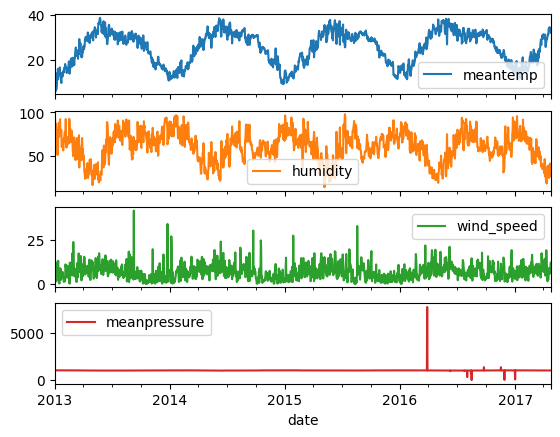

In [94]:
data.set_index(data['date'])[['meantemp','humidity','wind_speed','meanpressure']].plot(subplots=True)

In [95]:
input = data[['meantemp','humidity','wind_speed','meanpressure']]

In [96]:
input.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1575.000000,1575.000000,1575.000000,1575.000000
mean,25.231582,60.420115,6.903642,1010.589745
std,7.337316,16.956083,4.508803,175.298310
min,6.000000,13.428571,0.000000,-3.041667
25%,18.516667,49.750000,3.700000,1001.875000
50%,27.166667,62.380952,6.370000,1009.000000
75%,31.142857,72.125000,9.262500,1015.183334
max,38.714286,98.000000,42.220000,7679.333333


In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(input)

In [100]:
features=scaled
target=scaled[:,0]

In [101]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.12227074, 0.84037162, 0.        , 0.13260331],
         [0.04279476, 0.92905405, 0.07058266, 0.132881  ]]]),
 array([0.0356623]))

In [102]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [103]:
print("x_train ",x_train.shape)
print("y_train ",y_train.shape)
print("x_test ",x_test.shape)
print("y_test ",y_test.shape)

x_train  (1260, 4)
y_train  (1260,)
x_test  (315, 4)
y_test  (315,)


In [104]:
win_length=7
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [105]:
train_generator[0]

(array([[[0.12227074, 0.84037162, 0.        , 0.13260331],
         [0.04279476, 0.92905405, 0.07058266, 0.132881  ],
         [0.0356623 , 0.86993243, 0.10974262, 0.13299381],
         [0.08151383, 0.68468468, 0.02921206, 0.13279856],
         [0.        , 0.86796171, 0.08763619, 0.13271178],
         [0.03056769, 0.82027027, 0.03505448, 0.13290703],
         [0.03056769, 0.77060811, 0.14921838, 0.13316737]],
 
        [[0.04279476, 0.92905405, 0.07058266, 0.132881  ],
         [0.0356623 , 0.86993243, 0.10974262, 0.13299381],
         [0.08151383, 0.68468468, 0.02921206, 0.13279856],
         [0.        , 0.86796171, 0.08763619, 0.13271178],
         [0.03056769, 0.82027027, 0.03505448, 0.13290703],
         [0.03056769, 0.77060811, 0.14921838, 0.13316737],
         [0.08733624, 0.59459459, 0.16918184, 0.13300001]],
 
        [[0.0356623 , 0.86993243, 0.10974262, 0.13299381],
         [0.08151383, 0.68468468, 0.02921206, 0.13279856],
         [0.        , 0.86796171, 0.08763619, 0.13

In [106]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 7, 128)            68096     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 128)            0         
                                                                 
 lstm_7 (LSTM)               (None, 7, 128)            131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 7, 128)            0         
                                                                 
 dropout_4 (Dropout)         (None, 7, 128)            0         
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [108]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])


Epoch 1/50


<ipython-input-108-3b00c92e395b>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50,


40/40 [==============================] - 13s 91ms/step - loss: 0.0844 - mean_absolute_error: 0.2226 - val_loss: 0.0119 - val_mean_absolute_error: 0.0857
Epoch 2/50
40/40 [==============================] - 3s 66ms/step - loss: 0.0144 - mean_absolute_error: 0.0959 - val_loss: 0.0066 - val_mean_absolute_error: 0.0669
Epoch 3/50
40/40 [==============================] - 2s 40ms/step - loss: 0.0112 - mean_absolute_error: 0.0834 - val_loss: 0.0066 - val_mean_absolute_error: 0.0654
Epoch 4/50
40/40 [==============================] - 2s 51ms/step - loss: 0.0117 - mean_absolute_error: 0.0861 - val_loss: 0.0074 - val_mean_absolute_error: 0.0702
Epoch 5/50
40/40 [==============================] - 1s 35ms/step - loss: 0.0101 - mean_absolute_error: 0.0812 - val_loss: 0.0058 - val_mean_absolute_error: 0.0619
Epoch 6/50
40/40 [==============================] - 2s 56ms/step - loss: 0.0098 - mean_absolute_error: 0.0780 - val_loss: 0.0057 - val_mean_absolute_error: 0.0610
Epoch 7/50
40/40 [==============

In [109]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-109-a68ec1088d46>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.006061608903110027, 0.06174418702721596]

In [110]:
predictions=model.predict(test_generator)

10/10 [==============================] - 1s 12ms/step


In [111]:
predictions.shape[0]

308

In [112]:
predictions

array([[0.87246037],
       [0.8786368 ],
       [0.8683424 ],
       [0.8633601 ],
       [0.85998255],
       [0.8410738 ],
       [0.8272274 ],
       [0.8568713 ],
       [0.8665353 ],
       [0.87617016],
       [0.88014543],
       [0.85969126],
       [0.83924127],
       [0.8178298 ],
       [0.7940458 ],
       [0.8004074 ],
       [0.76477104],
       [0.7307749 ],
       [0.72388613],
       [0.755345  ],
       [0.7851451 ],
       [0.8045267 ],
       [0.7989397 ],
       [0.78363925],
       [0.7665958 ],
       [0.7720277 ],
       [0.7491988 ],
       [0.7274437 ],
       [0.70444924],
       [0.6967307 ],
       [0.68461   ],
       [0.69101954],
       [0.6986998 ],
       [0.7546318 ],
       [0.7980479 ],
       [0.8435198 ],
       [0.8373884 ],
       [0.80848104],
       [0.7730164 ],
       [0.7313274 ],
       [0.7008064 ],
       [0.6782785 ],
       [0.6450342 ],
       [0.627137  ],
       [0.6382897 ],
       [0.642694  ],
       [0.6835934 ],
       [0.729

In [115]:
y_test

array([0.81386463, 0.8783115 , 0.84061135, 0.86162664, 0.91266376,
       0.90556769, 0.76228166, 0.82150655, 0.82914847, 0.85119248,
       0.93040393, 0.89956332, 0.88238719, 0.8654476 , 0.75764192,
       0.89792576, 0.9007278 , 0.79858079, 0.68471616, 0.72025109,
       0.75463974, 0.83296943, 0.83347889, 0.84061135, 0.7580786 ,
       0.83296943, 0.81195415, 0.77947598, 0.7489083 , 0.77183406,
       0.74699782, 0.76419214, 0.64574236, 0.67631004, 0.66229985,
       0.80431223, 0.86162664, 0.85997089, 0.85971616, 0.79093886,
       0.7775655 , 0.79284935, 0.74317686, 0.68204148, 0.71935953,
       0.65338428, 0.65211063, 0.71120815, 0.70687773, 0.75463974,
       0.81195415, 0.82872392, 0.84978166, 0.7356623 , 0.82892371,
       0.85007278, 0.78300302, 0.79475983, 0.67576419, 0.70414847,
       0.74344978, 0.70101892, 0.7849345 , 0.77438137, 0.73144105,
       0.73022804, 0.79694323, 0.83098819, 0.78230632, 0.80042051,
       0.77886463, 0.73908297, 0.78008734, 0.77098496, 0.78820

In [114]:
x_test

array([[0.81386463, 0.49303209, 0.28090952, 0.13027926],
       [0.8783115 , 0.41903153, 0.24901311, 0.13006069],
       [0.84061135, 0.44763514, 0.26984503, 0.13043384],
       ...,
       [0.82227074, 0.32483108, 0.21056371, 0.13077228],
       [0.82150655, 0.16638514, 0.23596637, 0.13084061],
       [0.79475983, 0.16216216, 0.28794749, 0.13110328]])

In [116]:
x_test[:,1:][win_length:]

array([[0.57654139, 0.21124467, 0.13055587],
       [0.56028294, 0.17571649, 0.1307674 ],
       [0.45153326, 0.13915206, 0.13052396],
       [0.39178632, 0.18385836, 0.13034435],
       [0.50253378, 0.22890302, 0.13057331],
       [0.52072072, 0.1814306 , 0.13061282],
       [0.56545608, 0.18933562, 0.13041648],
       [0.72888514, 0.12874738, 0.13075926],
       [0.53737331, 0.20014211, 0.13071858],
       [0.55304054, 0.16090321, 0.13028632],
       [0.70912162, 0.19777357, 0.13089756],
       [0.78716216, 0.12390455, 0.13035248],
       [0.76499155, 0.04663074, 0.13033621],
       [0.74355997, 0.082455  , 0.13018977],
       [0.65339949, 0.12642113, 0.12998639],
       [0.59876126, 0.21029302, 0.13015615],
       [0.58614865, 0.1401883 , 0.13026299],
       [0.73828829, 0.12869098, 0.13022557],
       [0.62236064, 0.15943273, 0.13014096],
       [0.61792652, 0.11132165, 0.13005147],
       [0.69182855, 0.19058898, 0.13027113],
       [0.78937922, 0.13175036, 0.13044197],
       [0.

In [117]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [118]:
df_pred

,0,0,1,2
0,0.872460,0.576541,0.211245,0.130556
1,0.878637,0.560283,0.175716,0.130767
2,0.868342,0.451533,0.139152,0.130524
3,0.863360,0.391786,0.183858,0.130344
4,0.859983,0.502534,0.228903,0.130573
...,...,...,...,...
303,0.779030,0.166385,0.131750,0.130385
304,0.797102,0.306799,0.164910,0.130548
305,0.821889,0.324831,0.210564,0.130772
306,0.836424,0.166385,0.235966,0.130841


In [119]:
rev_trans=scaler.inverse_transform(df_pred)

In [120]:
rev_trans

array([[  34.54191766,   62.1875    ,    8.91875   ,  999.9375    ],
       [  34.74397457,   60.8125    ,    7.41875   , 1001.5625    ],
       [  34.40720135,   51.61538462,    5.875     ,  999.6923077 ],
       ...,
       [  32.88751882,   40.9       ,    8.89      , 1001.6       ],
       [  33.36301544,   27.5       ,    9.9625    , 1002.125     ],
       [  34.1591594 ,   27.14285714,   12.15714286, 1004.142857  ]])

In [121]:
df_final=input[predictions.shape[0]*-1:]

In [122]:
df_final.count()

meantemp        308
humidity        308
wind_speed      308
meanpressure    308
dtype: int64

In [123]:
df_final['App_Pred']=rev_trans[:,0]

<ipython-input-123-62669267b60b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,0]


In [124]:
df_final

,meantemp,humidity,wind_speed,meanpressure,App_Pred
1267,32.875000,62.187500,8.918750,999.937500,34.541918
1268,33.125000,60.812500,7.418750,1001.562500,34.743975
1269,33.846154,51.615385,5.875000,999.692308,34.407201
1270,36.437500,46.562500,7.762500,998.312500,34.244209
1271,35.428571,55.928571,9.664286,1000.071429,34.133715
...,...,...,...,...,...
1570,34.500000,27.500000,5.562500,998.625000,31.485417
1571,34.250000,39.375000,6.962500,999.875000,32.076628
1572,32.900000,40.900000,8.890000,1001.600000,32.887519
1573,32.875000,27.500000,9.962500,1002.125000,33.363015


<Axes: >

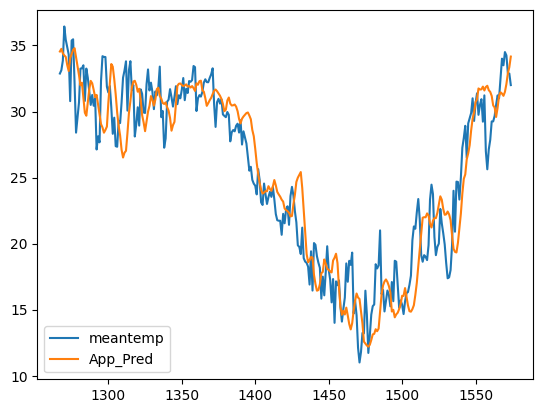

In [125]:
df_final[['meantemp','App_Pred']].plot()

In [127]:
future_dates = pd.date_range(start='2017-1-1',periods=308,freq='d')

In [130]:
df_final['date']=future_dates

<ipython-input-130-30c49064cbf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['date']=future_dates


In [131]:
df_final

,meantemp,humidity,wind_speed,meanpressure,App_Pred,date
1267,32.875000,62.187500,8.918750,999.937500,34.541918,2017-01-01
1268,33.125000,60.812500,7.418750,1001.562500,34.743975,2017-01-02
1269,33.846154,51.615385,5.875000,999.692308,34.407201,2017-01-03
1270,36.437500,46.562500,7.762500,998.312500,34.244209,2017-01-04
1271,35.428571,55.928571,9.664286,1000.071429,34.133715,2017-01-05
...,...,...,...,...,...,...
1570,34.500000,27.500000,5.562500,998.625000,31.485417,2017-10-31
1571,34.250000,39.375000,6.962500,999.875000,32.076628,2017-11-01
1572,32.900000,40.900000,8.890000,1001.600000,32.887519,2017-11-02
1573,32.875000,27.500000,9.962500,1002.125000,33.363015,2017-11-03


<Axes: xlabel='date'>

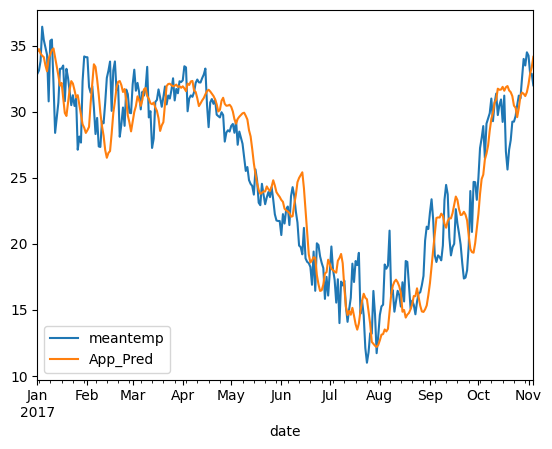

In [133]:
df_final.set_index('date')[['meantemp','App_Pred']].plot()